# DS 3000 - Assignment 5 (Group Practicum 1)

**Student Name**: Group 34 (Noam Steiner Tomer, Shruti Bodhanampati, Ian Carr, Allison Lee)

**Date**: 9/26/24


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1 — The DS Problem

In your own words, explain the Data Science problem that you were given.

The problem asks us to analyze airline on-time performance data for flights originating or departing from Arizona, Nevada, and California in 2019. The dataset includes flight dates, carrier codes, departure and arrival times, delays, and distances. The objective is to evaluate flight delays, identify patterns or trends in airline performance, and understand whether certain factors like the state, airport, or carrier contribute to longer delays. The analysis aims to provide insights that could help improve flight efficiency and on-time performance.

## Question 2 — Prepare the Data (10 pts)

Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).
Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.
At a high level explain what the dataset is about and provide at least three visualizations to support your explanation of DS problem from Question 1. Note: this explanation and visualizations should be relevant to the DS Problem in question 1.

In [40]:
# importing data into a dataframe
df = pd.read_csv('2019_ONTIME_REPORTING_FSW.csv')
df

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828.0,0.0,1353.0,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907.0,0.0,2159.0,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904.0,104.0,2016.0,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729.0,4.0,2215.0,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656.0,0.0,841.0,0.0,285.0,1947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897498,2019-01-31,UA,N73256,209,SNA,CA,SFO,CA,750.0,0.0,911.0,0.0,81.0,372
1897499,2019-01-31,UA,N39416,208,IAD,VA,LAX,CA,1855.0,0.0,2148.0,0.0,353.0,2288
1897500,2019-01-31,UA,N17104,207,BOS,MA,SFO,CA,802.0,2.0,1128.0,0.0,386.0,2704
1897501,2019-01-31,UA,N813UA,205,SFO,CA,PDX,OR,604.0,0.0,802.0,0.0,118.0,550


In [41]:
# removing duplicate data rows from the dataframe
df.drop_duplicates(inplace=True)
# seeing how many rows remain in the dataframe
df.shape[0]

1897503

In [42]:
# there were no duplicate rows removed

In [43]:
# checking frequency of missing values of columns
df.isnull().sum()

FL_DATE             0
CARRIER_CODE        0
TAIL_NUM         4791
FL_NUM              0
ORIGIN              0
ORIGIN_ST           0
DEST                0
DEST_ST             0
DEP_TIME        26707
DEP_DELAY       26715
ARR_TIME        28244
ARR_DELAY       31884
ELAPSED_TIME    31884
DISTANCE            0
dtype: int64

In [44]:
# indentifying the maximum number of missing variables in a row
df.isnull().sum(axis=1).sort_values(ascending = False)

33745      6
1369812    6
1163400    6
717776     6
461086     6
          ..
636507     0
636506     0
636504     0
636503     0
1897502    0
Length: 1897503, dtype: int64

In [45]:
# There are at maximum 6 variables missing at once from a row
# looking at one of the rows where all six variables are missing
df.loc[33745]

FL_DATE         2019-10-07
CARRIER_CODE            UA
TAIL_NUM               NaN
FL_NUM                 207
ORIGIN                 BOS
ORIGIN_ST               MA
DEST                   SFO
DEST_ST                 CA
DEP_TIME               NaN
DEP_DELAY              NaN
ARR_TIME               NaN
ARR_DELAY              NaN
ELAPSED_TIME           NaN
DISTANCE              2704
Name: 33745, dtype: object

This looks to be a widespread issue meaning that the best method to handle this missing data is deletion. I will remove all rows with NaN in the ELAPSED_TIME column as that is the highest column with the most number of variables deleted, tied with the ARR_DELAY column. 

In [47]:
# should removed 31884 rows where there was a NaN value in the ELAPSED_TIME col
df = df.drop(df[df['ELAPSED_TIME'].isnull()].index)
df.shape[0]

1865619

In [48]:
# orginal number of rows minus the new number of rows should equate to 31884
1897503-1865619

31884

In [49]:
# showing data type and non-null count of each variable in the dataframe
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1865619 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   FL_DATE       1865619 non-null  object 
 1   CARRIER_CODE  1865619 non-null  object 
 2   TAIL_NUM      1865619 non-null  object 
 3   FL_NUM        1865619 non-null  int64  
 4   ORIGIN        1865619 non-null  object 
 5   ORIGIN_ST     1865619 non-null  object 
 6   DEST          1865619 non-null  object 
 7   DEST_ST       1865619 non-null  object 
 8   DEP_TIME      1865619 non-null  float64
 9   DEP_DELAY     1865619 non-null  float64
 10  ARR_TIME      1865619 non-null  float64
 11  ARR_DELAY     1865619 non-null  float64
 12  ELAPSED_TIME  1865619 non-null  float64
 13  DISTANCE      1865619 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 213.5+ MB


All null rows were removed with the removal of NaN values from ELAPSED_TIME as the issue was widespread throughout the data. 

When looking at the variables represented in the dataframe, one can see that all categorical variables (CARRIER_CODE, TAIL_NUM, ORIGIN, ORIGIN_ST, DEST, DEST_ST) are of the object type, so they should be cast to the "category" type.

In [51]:
df['CARRIER_CODE'] = df['CARRIER_CODE'].astype('category')
df['TAIL_NUM'] = df['TAIL_NUM'].astype('category')
df['ORIGIN'] = df['ORIGIN'].astype('category')
df['ORIGIN_ST'] = df['ORIGIN_ST'].astype('category')
df['DEST'] = df['DEST'].astype('category')
df['DEST_ST'] = df['DEST_ST'].astype('category')

# checking the data types to make sure they are updated 
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1865619 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype   
---  ------        --------------    -----   
 0   FL_DATE       1865619 non-null  object  
 1   CARRIER_CODE  1865619 non-null  category
 2   TAIL_NUM      1865619 non-null  category
 3   FL_NUM        1865619 non-null  int64   
 4   ORIGIN        1865619 non-null  category
 5   ORIGIN_ST     1865619 non-null  category
 6   DEST          1865619 non-null  category
 7   DEST_ST       1865619 non-null  category
 8   DEP_TIME      1865619 non-null  float64 
 9   DEP_DELAY     1865619 non-null  float64 
 10  ARR_TIME      1865619 non-null  float64 
 11  ARR_DELAY     1865619 non-null  float64 
 12  ELAPSED_TIME  1865619 non-null  float64 
 13  DISTANCE      1865619 non-null  int64   
dtypes: category(6), float64(5), int64(2), object(1)
memory usage: 144.3+ MB


We can convert the DEP_TIME, DEP_DELAY, ARR_TIME, ARR_DELAY, and ELAPSED_TIME into datetime values.

Before we do this however we need to check that all the values in the columns we're going to convert to datetime have integer values since we need to convert the floats to integers during the datetime conversion.

In [53]:
def check_all_values_int_like(colname):
    num_non_integers = df[colname].apply(lambda x: not x.is_integer() if pd.notnull(x) else False).sum()
    print(f'{colname}: {num_non_integers}')

cols_to_convert = ['DEP_TIME', 'DEP_DELAY', 'ARR_TIME', 'ARR_DELAY', 'ELAPSED_TIME']
print("Number of non-integer values per column:")
for col in cols_to_convert:
    check_all_values_int_like(col)

Number of non-integer values per column:
DEP_TIME: 0
DEP_DELAY: 0
ARR_TIME: 0
ARR_DELAY: 0
ELAPSED_TIME: 0


As we can see all columns have integer values.

The columns DEP_TIME and ARR_TIME can be turned into datetime values by turning the integers into a time, e.g. 823 -> 08:23

In [55]:
def time_float_to_time_string(time_float):
    time_int_str = str(int(time_float)).zfill(4)
    hours, minutes = (time_int_str[:len(time_int_str)//2], time_int_str[len(time_int_str)//2:])
    hours = '00' if hours == '24' else hours
    return hours + ':' + minutes

df['DEP_TIME'] = pd.to_datetime(df['DEP_TIME'].apply(time_float_to_time_string), format='%H:%M')
df['ARR_TIME'] = pd.to_datetime(df['ARR_TIME'].apply(time_float_to_time_string), format='%H:%M')

The DEP_DELAY, ARR_DELAY, and ELAPSED_TIME columns have values of type float can be converted to timedelta.

In [57]:
def mins_float_to_time_string(mins_float):
    mins_int = int(mins_float)
    hours, minutes = divmod(mins_int, 60)
    return f'{hours:02}:{minutes:02}:00'

df['DEP_DELAY'] = pd.to_timedelta(df['DEP_DELAY'].apply(mins_float_to_time_string))
df['ARR_DELAY'] = pd.to_timedelta(df['ARR_DELAY'].apply(mins_float_to_time_string))
df['ELAPSED_TIME'] = pd.to_timedelta(df['ELAPSED_TIME'].apply(mins_float_to_time_string))

In [58]:
# checking the data types to make sure they are updated
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1865619 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype          
---  ------        --------------    -----          
 0   FL_DATE       1865619 non-null  object         
 1   CARRIER_CODE  1865619 non-null  category       
 2   TAIL_NUM      1865619 non-null  category       
 3   FL_NUM        1865619 non-null  int64          
 4   ORIGIN        1865619 non-null  category       
 5   ORIGIN_ST     1865619 non-null  category       
 6   DEST          1865619 non-null  category       
 7   DEST_ST       1865619 non-null  category       
 8   DEP_TIME      1865619 non-null  datetime64[ns] 
 9   DEP_DELAY     1865619 non-null  timedelta64[ns]
 10  ARR_TIME      1865619 non-null  datetime64[ns] 
 11  ARR_DELAY     1865619 non-null  timedelta64[ns]
 12  ELAPSED_TIME  1865619 non-null  timedelta64[ns]
 13  DISTANCE      1865619 non-null  int64          
dtypes: category(6), datetime64[ns](2), int6

The last data type to be addressed is the first column, the FL_DATE column. This column would best be represented by being represented as a DateTime variable in the data frame. This is a quick fix which will be taken care of in the following code.

In [60]:
# convert 'FL_DATE' to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])

In [61]:
# checking the data types to make sure they are updated 
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1865619 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype          
---  ------        --------------    -----          
 0   FL_DATE       1865619 non-null  datetime64[ns] 
 1   CARRIER_CODE  1865619 non-null  category       
 2   TAIL_NUM      1865619 non-null  category       
 3   FL_NUM        1865619 non-null  int64          
 4   ORIGIN        1865619 non-null  category       
 5   ORIGIN_ST     1865619 non-null  category       
 6   DEST          1865619 non-null  category       
 7   DEST_ST       1865619 non-null  category       
 8   DEP_TIME      1865619 non-null  datetime64[ns] 
 9   DEP_DELAY     1865619 non-null  timedelta64[ns]
 10  ARR_TIME      1865619 non-null  datetime64[ns] 
 11  ARR_DELAY     1865619 non-null  timedelta64[ns]
 12  ELAPSED_TIME  1865619 non-null  timedelta64[ns]
 13  DISTANCE      1865619 non-null  int64          
dtypes: category(6), datetime64[ns](3), int6

All of the variables have been updated to their correct types and missing data has been handled. It is now time to look for invalid data. 

In [63]:
# showing summary stats of all rows
df.describe(include='all')

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
count,1865619,1865619,1865619,1.865619e+06,1865619,1865619,1865619,1865619,1865619,1865619,1865619,1865619,1865619,1.865619e+06
unique,NaN,15,4885,NaN,152,43,152,43,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,WN,N706SK,NaN,LAX,CA,LAX,CA,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,543773,1734,NaN,216481,798690,216677,799137,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019-07-03 20:16:14.050972416,NaN,NaN,2.043568e+03,NaN,NaN,NaN,NaN,1900-01-01 13:36:44.254501632,0 days 00:13:06.940291667,1900-01-01 14:53:11.603204352,0 days 00:12:43.414330578,0 days 02:54:48.575320041,1.146858e+03
min,2019-01-01 00:00:00,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,0 days 00:00:00,1900-01-01 00:00:00,0 days 00:00:00,0 days 00:26:00,6.600000e+01
25%,2019-04-05 00:00:00,NaN,NaN,7.020000e+02,NaN,NaN,NaN,NaN,1900-01-01 09:13:00,0 days 00:00:00,1900-01-01 10:50:00,0 days 00:00:00,0 days 01:34:00,4.510000e+02
50%,2019-07-05 00:00:00,NaN,NaN,1.633000e+03,NaN,NaN,NaN,NaN,1900-01-01 13:26:00,0 days 00:00:00,1900-01-01 15:17:00,0 days 00:00:00,0 days 02:33:00,9.540000e+02
75%,2019-10-02 00:00:00,NaN,NaN,2.710000e+03,NaN,NaN,NaN,NaN,1900-01-01 17:57:00,0 days 00:08:00,1900-01-01 19:36:00,0 days 00:07:00,0 days 04:04:00,1.744000e+03
max,2019-12-31 00:00:00,NaN,NaN,7.910000e+03,NaN,NaN,NaN,NaN,1900-01-01 23:59:00,1 days 14:35:00,1900-01-01 23:59:00,1 days 15:10:00,0 days 09:12:00,2.979000e+03


In [64]:
# list of states to check against
valid_states = ['CA', 'NV', 'AZ']

# check if values in columns ORIGIN_ST OR DEST_ST are in valid_states list
df['CHECKING_ST'] = df['ORIGIN_ST'].isin(valid_states) | df['DEST_ST'].isin(valid_states)
df['CHECKING_ST'].value_counts()

# drop column since it is only being used here
df.drop(['CHECKING_ST'], axis=1)

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,1900-01-01 08:28:00,0 days 00:00:00,1900-01-01 13:53:00,0 days 00:00:00,0 days 03:25:00,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1900-01-01 19:07:00,0 days 00:00:00,1900-01-01 21:59:00,0 days 00:00:00,0 days 01:52:00,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1900-01-01 19:04:00,0 days 01:44:00,1900-01-01 20:16:00,0 days 01:41:00,0 days 03:12:00,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1900-01-01 17:29:00,0 days 00:04:00,1900-01-01 22:15:00,0 days 00:03:00,0 days 02:46:00,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,1900-01-01 06:56:00,0 days 00:00:00,1900-01-01 08:41:00,0 days 00:00:00,0 days 04:45:00,1947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897498,2019-01-31,UA,N73256,209,SNA,CA,SFO,CA,1900-01-01 07:50:00,0 days 00:00:00,1900-01-01 09:11:00,0 days 00:00:00,0 days 01:21:00,372
1897499,2019-01-31,UA,N39416,208,IAD,VA,LAX,CA,1900-01-01 18:55:00,0 days 00:00:00,1900-01-01 21:48:00,0 days 00:00:00,0 days 05:53:00,2288
1897500,2019-01-31,UA,N17104,207,BOS,MA,SFO,CA,1900-01-01 08:02:00,0 days 00:02:00,1900-01-01 11:28:00,0 days 00:00:00,0 days 06:26:00,2704
1897501,2019-01-31,UA,N813UA,205,SFO,CA,PDX,OR,1900-01-01 06:04:00,0 days 00:00:00,1900-01-01 08:02:00,0 days 00:00:00,0 days 01:58:00,550


In [65]:
# each flight in the data either took off or left from one of the states ['CA', 'NV', 'AZ']
# checking if any flights left and landed at the same airport
count = (df['ORIGIN'].astype(str) == df['DEST'].astype(str)).sum()
print(count)

0


In [66]:
# no flights left and landed at the same airport

To provide a clearer understanding of the dataset, we will create 3 visualizations that will help us better understand the overall flight patterns in Arizona, Nevada, and California. The visualizations will provide a broader context for the dataset, which can help us understand flight efficiency and on-time performance.

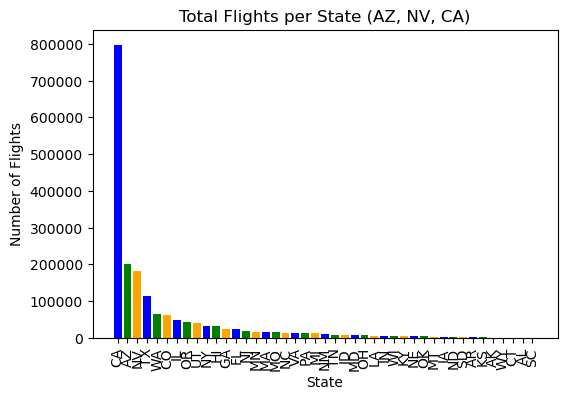

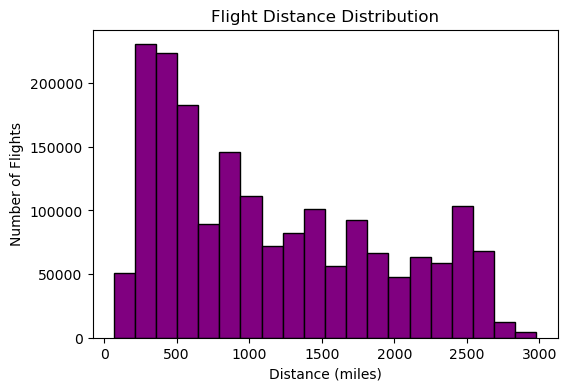

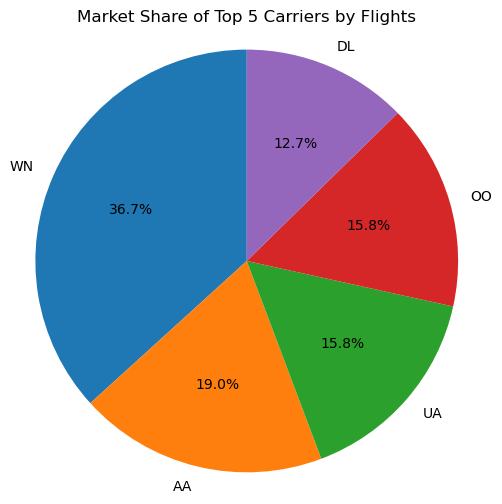

In [68]:
# 1. Total Number of Flights per State (AZ, NV, CA)
state_flight_counts = df['ORIGIN_ST'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(state_flight_counts.index, state_flight_counts.values, color=['blue', 'green', 'orange'])
plt.title('Total Flights per State (AZ, NV, CA)')
plt.xlabel('State')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90)
plt.show()

# 2. Flight Distance Distribution
plt.figure(figsize=(6, 4))
plt.hist(df['DISTANCE'], bins=20, color='purple', edgecolor='black')
plt.title('Flight Distance Distribution')
plt.xlabel('Distance (miles)')
plt.ylabel('Number of Flights')
plt.show()

# 3. Carrier Market Share by Number of Flights
carrier_flight_counts = df['CARRIER_CODE'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(carrier_flight_counts.head(5), labels=carrier_flight_counts.index[:5], autopct='%1.1f%%', startangle=90)
plt.title('Market Share of Top 5 Carriers by Flights')
plt.axis('equal')
plt.show()

These visualizations help us understand the dataset and the homework. By examining the total flight volume per state, we gain insight into the distribution of air traffic across Arizona, Nevada, and California, which is essential for contextualizing the delays analyzed later. A higher concentration of flights, as seen in California, may lead to more congestion and, consequently, a higher potential for delays. The flight distance distribution is also relevant to our analysis, as it helps us understand the types of flights in the dataset. This is essential when considering how flight distance may affect delays and how we interpret the performance of flights departing from or arriving in these states. Lastly, the carrier market share helps us see which airlines are responsible for most flights in the dataset, which becomes particularly relevant when we assess the delay patterns for specific carriers. 

## Question 3 — (20 points)

Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results. Note: it's important to explain your rational for determining what is "the most air traffic". For example, are you evaluating the frequency of flights or total flight time. Justify your response.
For each region i.e. the 3 states (AZ, NV, CA), analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the results for the top 5 destinations.
For each region, calculate the proportion* of flights from each airline/operator. Visualize the top 10 results. Explain the results.
*Hint: Don't forget that proportion is an explicit requirement.

Q3.1: We define "the most air traffic" to be the highest number of flights, both arriving and departing. The reason we use this definition is that "air traffic" as a term means the number of aircraft that are airborne in a given airspace at a given time. A good proxy for this is the number of flights arriving to and departing from the region, since the more arrivals and departures there are the more airplanes are in the sky at a time.

<Axes: title={'center': 'Total Arrivals and Departures per State'}, xlabel='State', ylabel='Total Arrivals and Departures'>

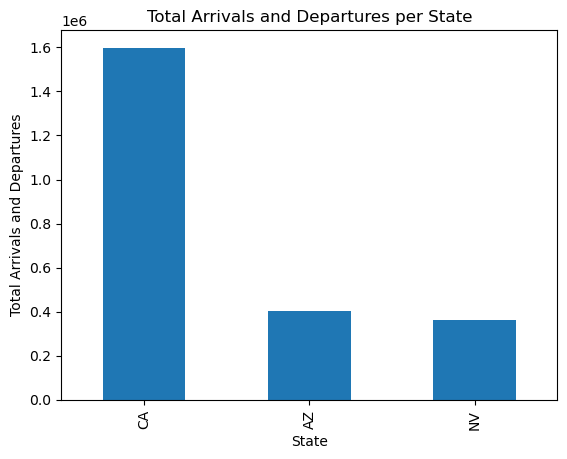

In [72]:
departures = df['ORIGIN_ST'].value_counts()
arrivals = df['DEST_ST'].value_counts()

# combine the counts of departures and arrivals for each state to get total
total_air_traffic = departures.add(arrivals, fill_value=0)

filtered_total_air_traffic = total_air_traffic[total_air_traffic.index.isin(['CA', 'NV', 'AZ'])]
filtered_total_air_traffic.plot(kind='bar', title='Total Arrivals and Departures per State', xlabel='State', ylabel='Total Arrivals and Departures')

As we can see California has the most air traffic by far. It has almost twice as many arrivals and departures as the other two states combined. This is not surprising since California takes in almost all flights coming to the west coast of the US, including international flights crossing the Pacific Ocean as well as some direct flights to Europe which increases its total arrivals and departures.

Q3.2: Now we will look at the most popular inbound/outbound airports in each of the three states.

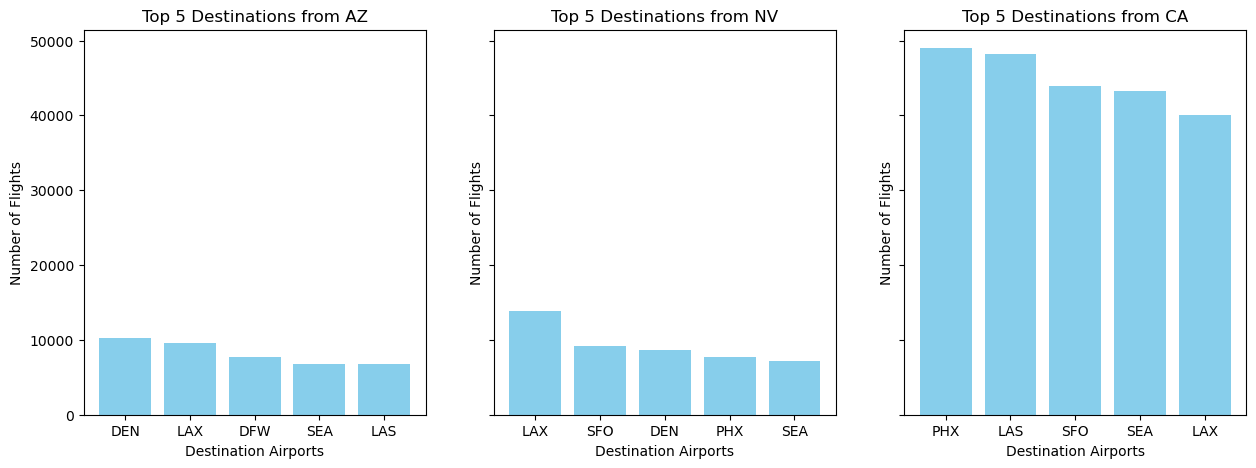

In [75]:
states = ['AZ', 'NV', 'CA']
filtered_df_states = df[df['ORIGIN_ST'].isin(states)]

# Count number of flights to each destination
popular_destinations = (
    filtered_df_states.groupby(['ORIGIN_ST', 'DEST'], observed=True)
    .size()
    .reset_index(name='num_flights')
)

# Get top 5 most popular destinations
top_destinations = popular_destinations.groupby('ORIGIN_ST', observed=True)[['DEST', 'num_flights']].apply(
    lambda x: x.nlargest(5, 'num_flights')
).reset_index()


fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, state in enumerate(states):
    state_data = top_destinations[top_destinations['ORIGIN_ST'] == state]
    axes[i].bar(state_data['DEST'], state_data['num_flights'], color='skyblue')
    axes[i].set_title(f'Top 5 Destinations from {state}')
    axes[i].set_xlabel('Destination Airports')
    axes[i].set_ylabel('Number of Flights')

plt.show()

We can see that for Arizona and Nevada one of the most popular destinations is LAX, and that for California the two most popular destinations are Pheonix and Las Vegas. Interestingly for both Nevada and California one of the most popular destinations is San Francisco, meaning that there are a lot of California flights that never leave the state. Seattle is also a popular destination for all 3 states. One interesting detail is that one of the most popular destinations from Arizona is to the Dallas Fort-Worth airport, which isn't seen in any of the other states. The fact that LAX is present in the top 5 destinations from California suggests that similarly to the flights to San Francisco, there are a lot of flights internal to California that take passengers between different parts of California. Denver is also a popular destination from both Arizona and Nevada.

Q3.3: Now we will look at the top 10 airlines by proportion of flights in each state.

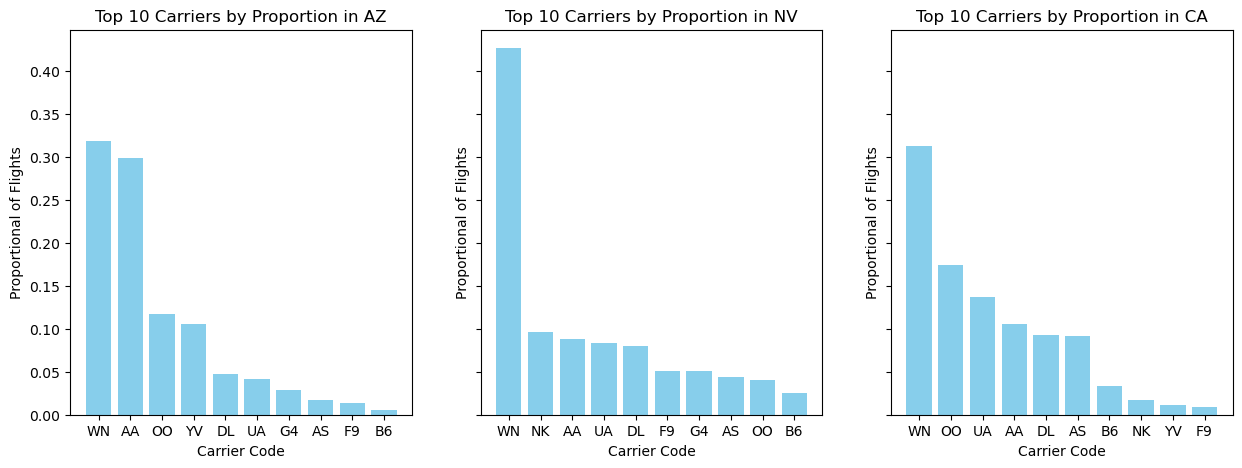

In [78]:
states_to_analyze = ['AZ', 'NV', 'CA']
filtered_df_states = df[df['ORIGIN_ST'].isin(states_to_analyze)]

# Group by origin state and carrier to count the number of flights per carrier
flight_counts = (
    filtered_df_states.groupby(['ORIGIN_ST', 'CARRIER_CODE'], observed=True)
    .size()
    .reset_index(name='num_flights')
)

# Calculate total flights per state
total_flights_per_state = flight_counts.groupby('ORIGIN_ST', observed=True)['num_flights'].sum()

def calculate_proportion(row):
    return row['num_flights'] / float(total_flights_per_state.loc[row['ORIGIN_ST']])

flight_counts['proportion'] = flight_counts.apply(calculate_proportion, axis=1)

top_airlines = flight_counts.groupby('ORIGIN_ST', observed=True)[['CARRIER_CODE','proportion']].apply(
    lambda x: x.nlargest(10, 'proportion')
).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, state in enumerate(states_to_analyze):
    state_data = top_airlines[top_airlines['ORIGIN_ST'] == state]
    axes[i].bar(state_data['CARRIER_CODE'], state_data['proportion'], color='skyblue')
    axes[i].set_title(f'Top 10 Carriers by Proportion in {state}')
    axes[i].set_xlabel('Carrier Code')
    axes[i].set_ylabel('Proportional of Flights')

plt.show()

Looking at the results we can see that Southwest Airlines (WN) is the most common carrier in all 3 states. This makes sense because Southwest Airlines' main business is having frequent flights around the southwestern US. An interesting detail is that in Arizona, American Airlines is almost tied with Southwest Airlines in terms of proportion of flights but that it is much further behind in Nevada and California. We see Delta Airlines is present in the middle of the top 10 carriers by proportion for all 3 states. This makes sense because Delta is spread much wider in terms of flights, which will decrease the amount of presence they have in any particular area. Interestingly Sky West Airlines (OO) is very present in Arizona and California, but is much less present in Nevada. Conversly, United Airlines is much more present in California and Nevada but not Arizona. We can see Mesa Airlines (YV) is present in both Arizona and California, but much more so in Arizona. This makes sense Mesa Airlines is a regional carrier based in Phoenix, Arizona. There are some other carriers like Frontier Airlines (F9), Jetblue (B6), and Allegiant (G4) which make up a much smaller proportion of flights in each state.

## Question 4 — (20 points)

Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.
Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?
**Tip: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.

4.1 - We will begin question 4. by exploring the carriers within the dataset and demonstrating at least 2 patterns that we identified

In [82]:
# group by carrier and calculate average arrival and departure delays
carrier_delays = df.groupby('CARRIER_CODE', observed=True).agg(
    avg_arr_delay=('ARR_DELAY', 'mean'),
    avg_dep_delay=('DEP_DELAY', 'mean')
).reset_index()

# sort by average delays to identify carriers with the highest delays
top_carriers_by_arr_delay = carrier_delays.sort_values(by='avg_arr_delay', ascending=False).head(10)
top_carriers_by_dep_delay = carrier_delays.sort_values(by='avg_dep_delay', ascending=False).head(10)

def format_timedelta(td):
    total_seconds = td.total_seconds()
    minutes = int(total_seconds // 60)
    seconds = round(total_seconds % 60, 3)
    return f'{minutes}:{seconds:06.3f}'

def print_carrier_delay(row):
    carrier_code = row['CARRIER_CODE']
    arr_delay = row['avg_arr_delay']
    dep_delay = row['avg_dep_delay']
    print(f"{carrier_code}        {format_timedelta(arr_delay)}        {format_timedelta(dep_delay)}")

# Apply this function to each row in top_carriers_by_arr_delay and top_carriers_by_dep_delay
print("Top carriers by Arrival Delay (minutes):")
print("Carrier   Arrival Delay   Departure Delay")
top_carriers_by_arr_delay.apply(print_carrier_delay, axis=1)

print("\nTop carriers by Departure Delay (minutes):")
print("Carrier   Arrival Delay   Departure Delay")
# assign to prevent printing of leftover values since this is the last expression in the cell
_ = top_carriers_by_dep_delay.apply(print_carrier_delay, axis=1)

Top carriers by Arrival Delay (minutes):
Carrier   Arrival Delay   Departure Delay
F9        19:00.000        19:58.552
YX        18:21.818        18:37.792
B6        16:03.177        16:27.987
UA        15:42.359        15:25.156
YV        15:30.933        15:24.329
AA        14:39.835        14:36.673
OO        14:33.520        14:24.654
G4        13:48.967        13:10.195
EV        13:14.681        11:37.660
HA        12:57.141        11:02.018

Top carriers by Departure Delay (minutes):
Carrier   Arrival Delay   Departure Delay
F9        19:00.000        19:58.552
YX        18:21.818        18:37.792
B6        16:03.177        16:27.987
UA        15:42.359        15:25.156
YV        15:30.933        15:24.329
AA        14:39.835        14:36.673
OO        14:33.520        14:24.654
G4        13:48.967        13:10.195
NK        12:43.332        13:02.173
EV        13:14.681        11:37.660


In this part, we explore the carriers within the dataset and identify two significant patterns related to flight delays. These patterns are crucial for understanding the performance of different airlines and helping stakeholders make informed decisions regarding airline operations, customer service improvements, and regional airport management. One important pattern is that certain carriers, such as Frontier Airlines (F9) and JetBlue Airways (B6), consistently experience higher delays than others. Both airlines rank among the top 10 regarding average arrival and departure delays across multiple regions. This is crucial because it indicates potential operational inefficiencies or challenges in maintaining on-time performance, affecting customer satisfaction and airline reliability. Identifying carriers with persistent delays helps airports and airlines target improvement efforts to reduce delays and enhance service quality. Another key pattern is that delays for the same carrier vary by region. For example, airlines like SkyWest Airlines (OO) have higher average delays in certain states like Arizona (AZ) than others. This suggests that regional factors, such as airport congestion or weather conditions, may contribute to higher delays.

4.2 - Analyze the minimum, maximum, and average arrival and departure delays for each Airline/Carrier

In [85]:
# group by carrier to calculate minimum, maximum, and average for both arrival and departure delays
carrier_delay_stats = df.groupby('CARRIER_CODE', observed=True).agg(
    min_arr_delay=('ARR_DELAY', 'min'),
    max_arr_delay=('ARR_DELAY', 'max'),
    avg_arr_delay=('ARR_DELAY', 'mean'),
    min_dep_delay=('DEP_DELAY', 'min'),
    max_dep_delay=('DEP_DELAY', 'max'),
    avg_dep_delay=('DEP_DELAY', 'mean')
).reset_index()

carrier_delay_stats.head()

,CARRIER_CODE,min_arr_delay,max_arr_delay,avg_arr_delay,min_dep_delay,max_dep_delay,avg_dep_delay
0,AA,0 days,1 days 15:10:00,0 days 00:14:39.834743079,0 days,1 days 14:35:00,0 days 00:14:36.673377487
1,AS,0 days,0 days 18:07:00,0 days 00:11:54.737922130,0 days,0 days 18:37:00,0 days 00:10:43.457090439
2,B6,0 days,1 days 05:16:00,0 days 00:16:03.176887666,0 days,1 days 05:29:00,0 days 00:16:27.986665961
3,DL,0 days,0 days 21:26:00,0 days 00:10:30.102772619,0 days,0 days 21:06:00,0 days 00:10:48.173784977
4,EV,0 days,0 days 02:55:00,0 days 00:13:14.680851063,0 days,0 days 02:44:00,0 days 00:11:37.659574468


This step analyzes the minimum, maximum, and average delays for arrival and departure times across all carriers. Our analysis shows how each airline performs under different conditions. For example, while some airlines may have occasional extreme delays (as seen from the maximum delay), others might consistently have longer average delays, which is more concerning for operational efficiency and customer experience. Analyzing the minimum delays helps us understand whether airlines can also perform efficiently in some instances. The combination of minimum, maximum, and average delays paints a clearer picture of each carrier's best and worst-case scenarios. This data is essential for airlines to identify areas for improvement, allowing them to reduce their overall delay times and maintain a more consistent on-time performance. Additionally, airports and regulatory authorities can use this information to hold airlines accountable for their punctuality.

4.3 - Visualize the top 10 results for delays

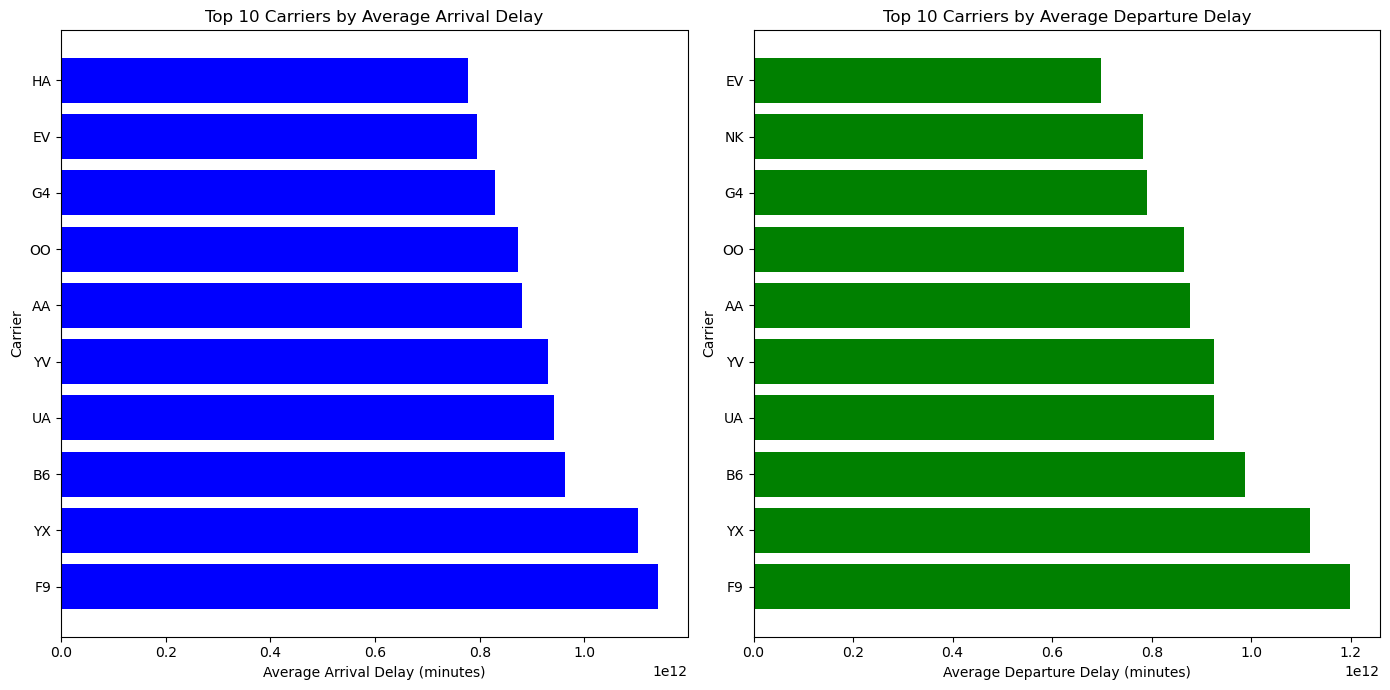

In [88]:
import matplotlib.pyplot as plt

# sort the data by average arrival and departure delays for visualization
top_10_carriers_by_arr_delay = carrier_delay_stats.sort_values(by='avg_arr_delay', ascending=False).head(10)
top_10_carriers_by_dep_delay = carrier_delay_stats.sort_values(by='avg_dep_delay', ascending=False).head(10)

plt.figure(figsize=(14, 7))

# average arrival delays
plt.subplot(1, 2, 1)
plt.barh(top_10_carriers_by_arr_delay['CARRIER_CODE'], top_10_carriers_by_arr_delay['avg_arr_delay'], color='blue')
plt.title('Top 10 Carriers by Average Arrival Delay')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Carrier')

# average departure delays
plt.subplot(1, 2, 2)
plt.barh(top_10_carriers_by_dep_delay['CARRIER_CODE'], top_10_carriers_by_dep_delay['avg_dep_delay'], color='green')
plt.title('Top 10 Carriers by Average Departure Delay')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Carrier')

plt.tight_layout()
plt.show()

In this step, we visualize the top 10 carriers based on their average arrival and departure delays. By presenting the data graphically, we could spot patterns, such as which airlines consistently rank high in delays, making it easier to communicate insights to stakeholders. The bar charts help reveal that certain airlines, like Frontier Airlines (F9) and JetBlue Airways (B6), appear frequently among the top delayed carriers. This visual representation is important because it simplifies the data, making it more accessible and easier to understand. It also allows airlines to benchmark their performance against competitors and prioritize strategies to reduce delays.

## Question 5 — (30 points)

Evaluate which airlines have the best performance in the region. Display the top 10 airlines.
Note: it's important to explain your rational for determining "the best performance".
For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines. 
Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.

Q5.1: Evaluate which airlines have the best performance in the region.

One way to determine the best performance of an airline would be to determine the average delay time for each flight from that airline. To do so, it makes most sense to create a new column averaging the departure delay and arrival delay to find the overall delay for each flight. From there, I will divide the total time of all delays for an airline by the total number of flights to find the average time each flight is delayed. This data will show how long on average customers will wait because of delays by airline.

  CARRIER_CODE  AVG_DELAY
0           WN      10.47
1           DL      10.65
2           MQ      10.84
3           AS      11.32
4           HA      11.99
5           EV      12.44
6           NK      12.88
7           G4      13.49
8           OO      14.48
9           AA      14.64


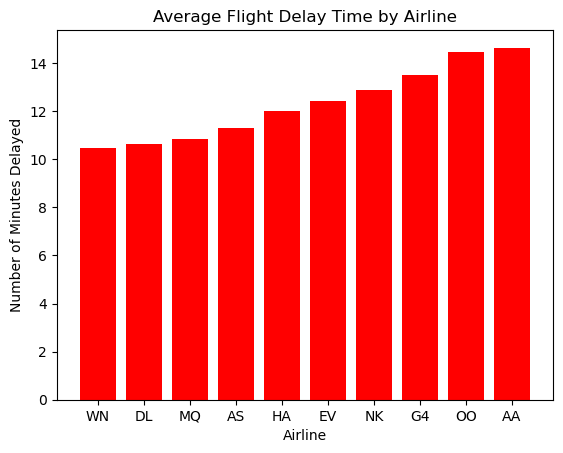

In [93]:
# creating new column for overall delay
df['OVERALL_DELAY']=(df['ARR_DELAY']+df['DEP_DELAY'])/2

# grouping df and finding avg overall delay
avg_delay_time = pd.DataFrame(df.groupby('CARRIER_CODE', observed=False)['OVERALL_DELAY'].apply(lambda x: x.sum()/x.count())).sort_values(by='OVERALL_DELAY').head(10).reset_index()
avg_delay_time['AVG_DELAY'] = round(avg_delay_time['OVERALL_DELAY'] / np.timedelta64(1, 'm'), 2)
avg_delay_time = avg_delay_time.drop(columns='OVERALL_DELAY')
print(avg_delay_time)

# display the top ten airlines with the shortest average number of flights
plt.bar(avg_delay_time['CARRIER_CODE'], avg_delay_time['AVG_DELAY'], color='red')
plt.ylabel('Number of Minutes Delayed')
plt.xlabel('Airline')
plt.title('Average Flight Delay Time by Airline')
plt.show()

The graph is showing that the airline with the least amount of average delay time is Southwest Airlines. The graph shows that Southwest's average delay time was 10.47 minutes. The following airlines with the least amount of time were Delta with an average delay time of 10.65 minutes and then Envoy Air with an average delay time of just 10.84 minutes.

One additional measure can be to find the proportion of delayed flights for each airline. This will help show which airlines have the lowest frequency of delayed flights. 

  CARRIER_CODE  DELAYED %
0           OO      35.97
1           YX      36.36
2           EV      38.30
3           YV      39.04
4           NK      40.24
5           B6      43.53
6           G4      43.81
7           UA      44.45
8           DL      45.66
9           AS      45.74


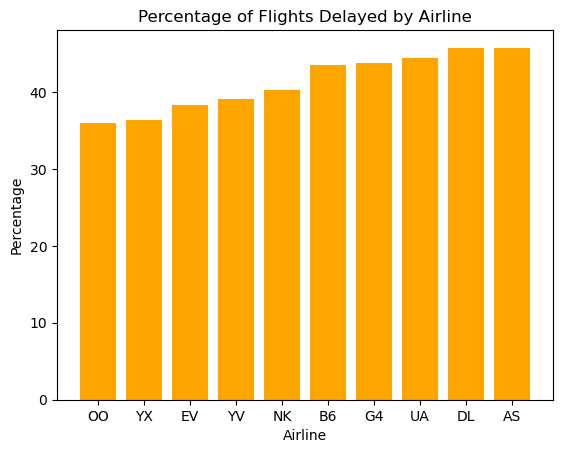

''

In [95]:
# finding proportion of flights delayed
df['DELAYED %'] = np.where(df['OVERALL_DELAY'] > pd.Timedelta(0), 1, 0)
delay_percent = pd.DataFrame(df.groupby('CARRIER_CODE', observed=False)['DELAYED %'].apply(lambda x: round(x.sum()/x.count() * 100, 2))).sort_values(by='DELAYED %').head(10).reset_index()
print(delay_percent)

# display the top ten airlines with the leat percentage of flights delayed
plt.bar(delay_percent['CARRIER_CODE'], delay_percent['DELAYED %'], color='orange')
plt.ylabel('Percentage')
plt.xlabel('Airline')
plt.title('Percentage of Flights Delayed by Airline')
plt.show()
;

The graph is showing that the airline with the lowest proportion of flights delayed is Skywest airlines. The graph shows that Skywest's proportion of flights delayed was just under 36%. The following airlines with the lowest proportions were Republic Airways with 36.36% of flights being delayed and then ExpressJet Airlines with roughly 38.30% of flights being delayed.

Q5.2: Now we will look at the total monthly flight hours for each airline, for the top 10 airlines.

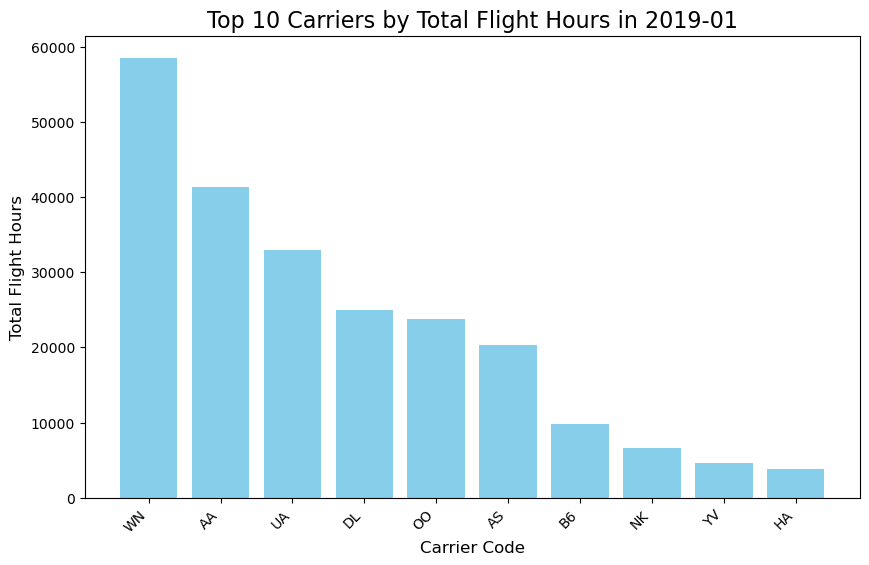

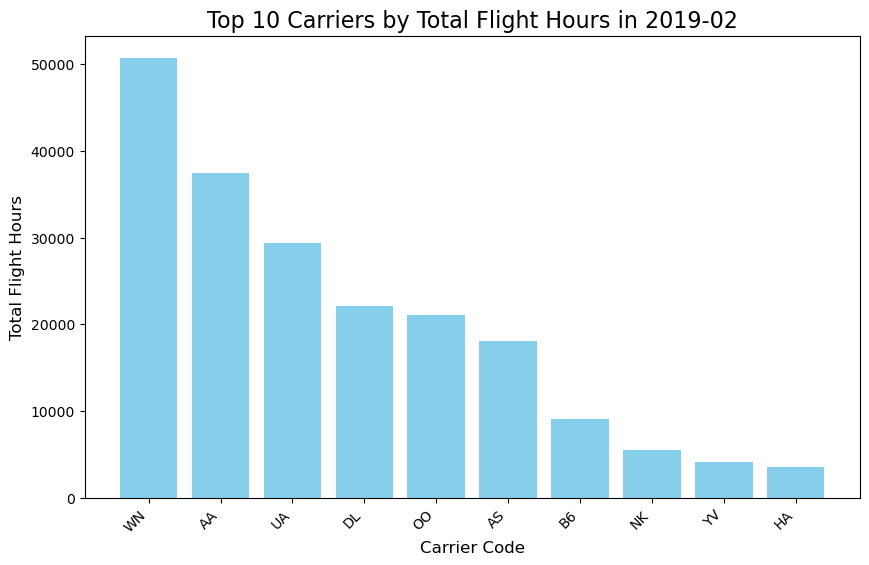

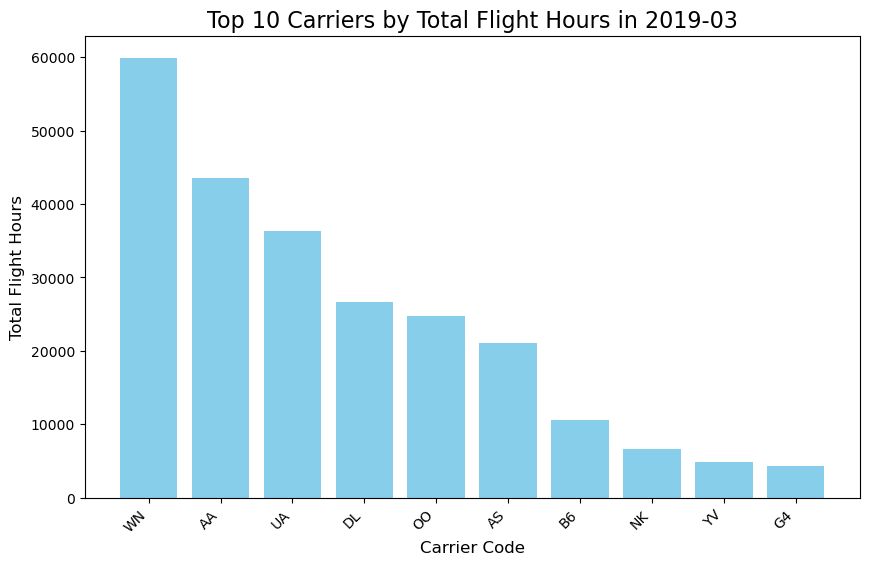

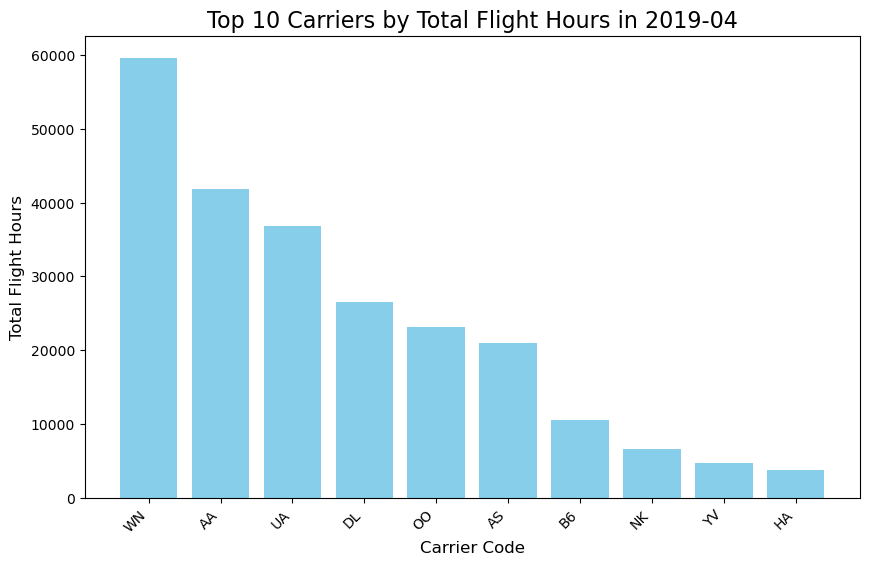

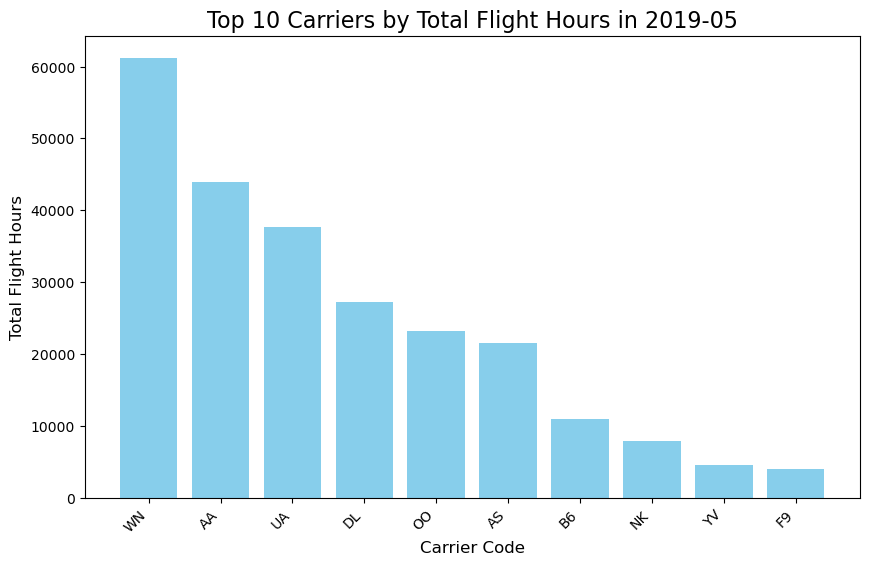

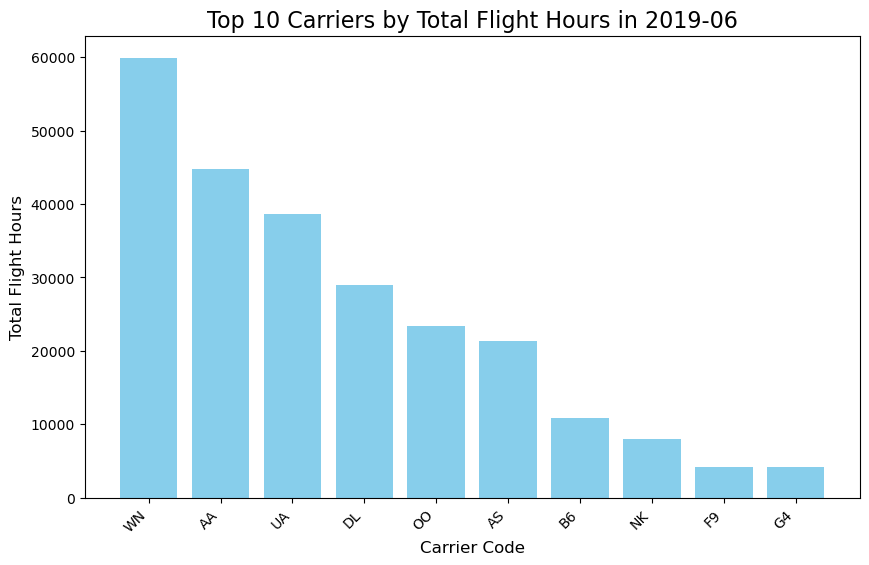

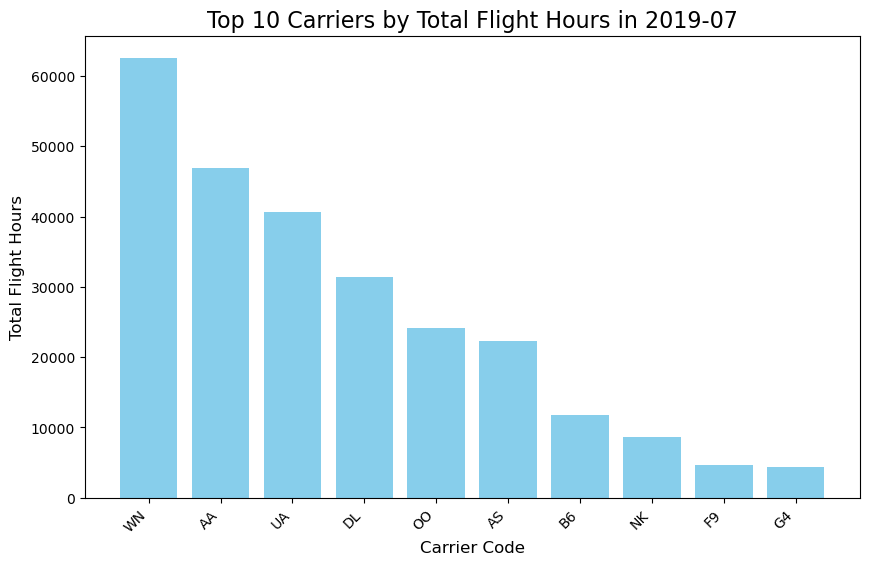

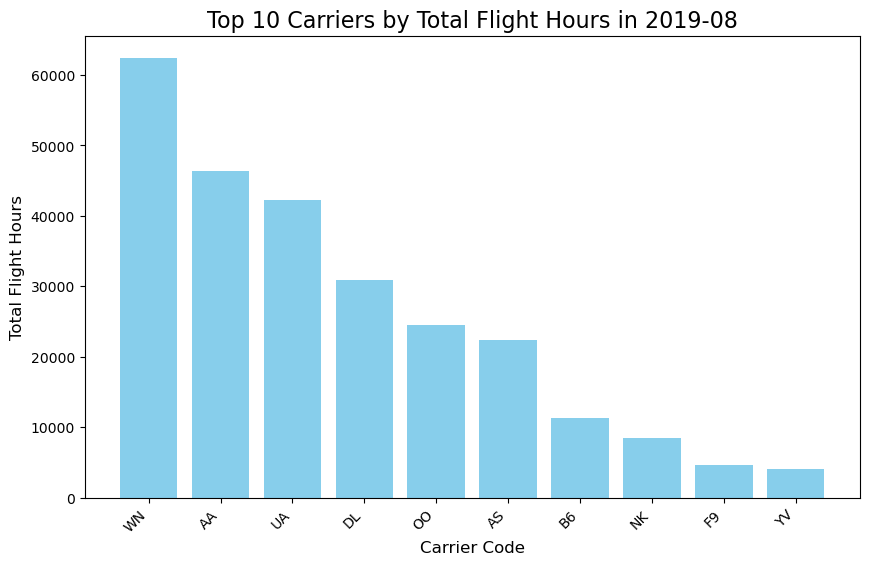

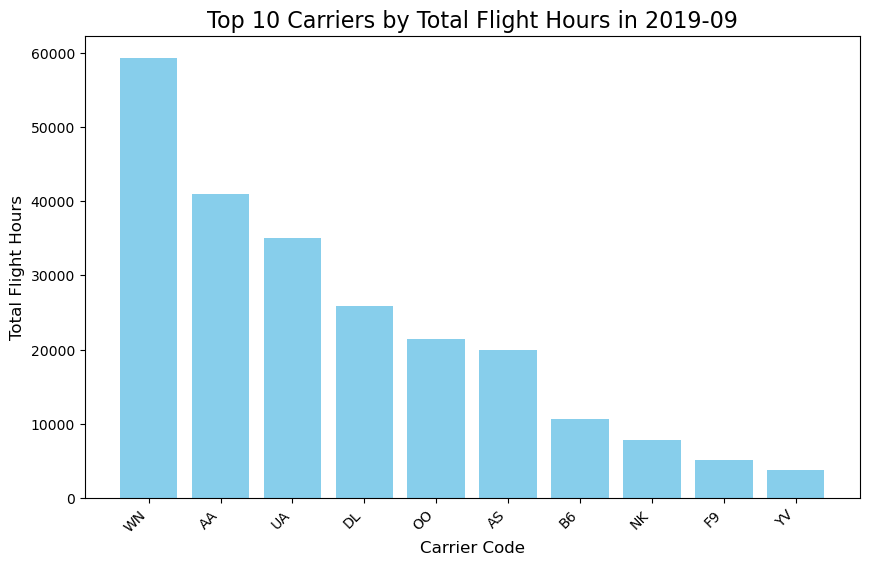

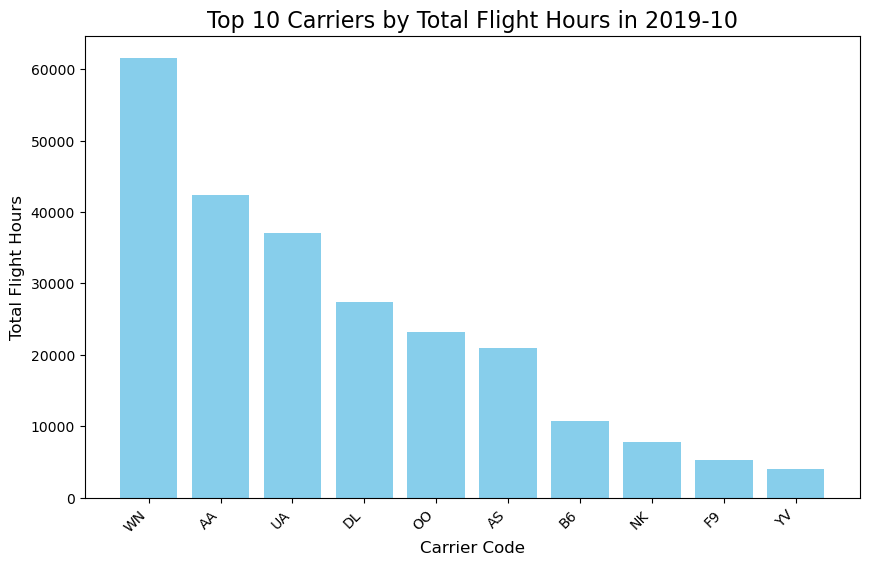

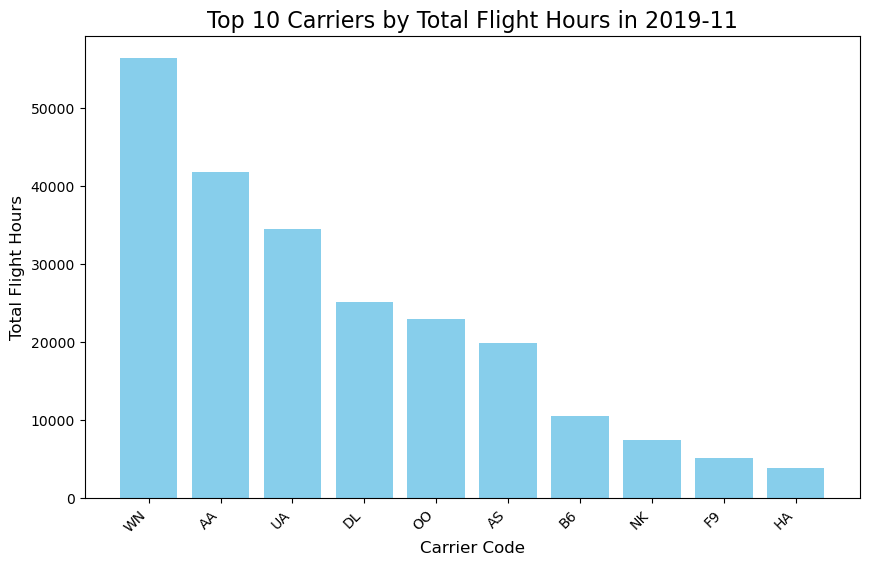

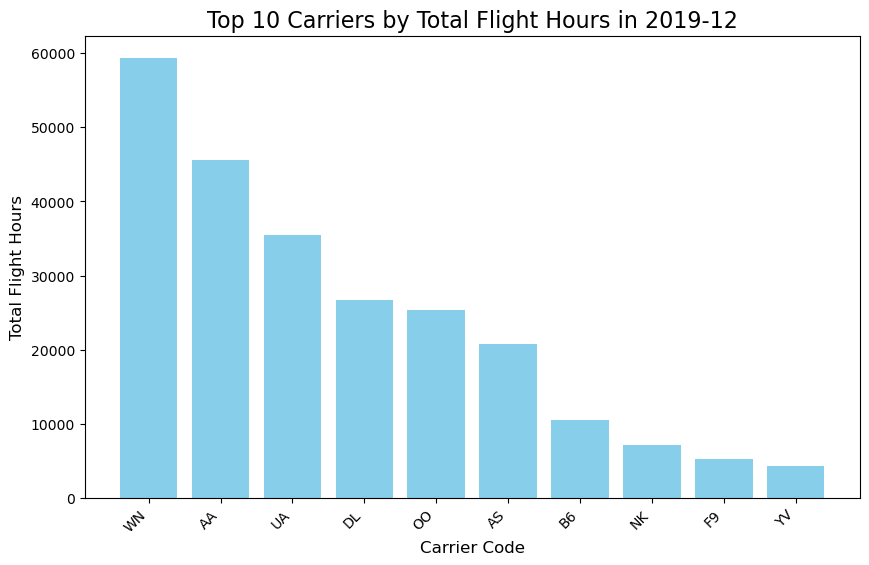

In [98]:
states_to_analyze = ['AZ', 'NV', 'CA']
filtered_df_states = df[df['ORIGIN_ST'].isin(states_to_analyze)]
filtered_df_states = filtered_df_states.copy()
filtered_df_states['YEAR_MONTH'] = filtered_df_states['FL_DATE'].dt.to_period('M')
filtered_df_states['FLIGHT_HOURS'] = filtered_df_states['ELAPSED_TIME'].dt.total_seconds() / 3600

monthly_carrier_hours = filtered_df_states.groupby(['YEAR_MONTH', 'CARRIER_CODE'], observed=True)['FLIGHT_HOURS'].sum().reset_index()

top_carriers_per_month = monthly_carrier_hours.groupby('YEAR_MONTH', observed=True)[['YEAR_MONTH', 'CARRIER_CODE', 'FLIGHT_HOURS']].apply(
    lambda x: x.nlargest(10, 'FLIGHT_HOURS')
).reset_index(drop=True)

months = top_carriers_per_month['YEAR_MONTH'].unique()

for month in months:
    monthly_data = top_carriers_per_month[top_carriers_per_month['YEAR_MONTH'] == month]
    monthly_data = monthly_data.sort_values(by='FLIGHT_HOURS', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(monthly_data['CARRIER_CODE'], monthly_data['FLIGHT_HOURS'], color='skyblue')
    plt.title(f'Top 10 Carriers by Total Flight Hours in {month}', fontsize=16)
    plt.xlabel('Carrier Code', fontsize=12)
    plt.ylabel('Total Flight Hours', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.show()

Southwest Airlines (WN) have the most total flight hours every month, followed by American Airlines and United Airlines. This corroborates our findings in Q3 where we found that Southwest Airlines was the top airline by proportion of flights for all 3 states. It makes sense that the carrier with the most flights will have the most flight hours in a particular region. The total flight hours per carrier are extremely consistent across months as well, which makes sense considering the fact that flight scheduling and routes are also very consistent over time. An interesting detail is that in February the total flight hours for Southwest Airlines is lower than usual by about 1000 flight hours. For other airlines the number of flight hours also dropped, but not to the same extent.

## Question 6 — (20 points)

Select any THREE (3) aircraft***, and explore the data to analyze the following for each aircraft:

Indicate which airline operates the selected aircraft and where it often travels.
Arrival and departure delays at the airports where it traveled.
Create summary statistics on the distance traveled.
Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.
***Note: the TAIL_NUM can help you to identify each unique aircraft.
 

Question 6 — Summary

Summarize the overall analysis and share THREE (3) key findings.

In [101]:
# exploring the tail numbers (Max, median, min freq.)
# aggregating the frequencies
tails_counts = df['TAIL_NUM'].value_counts()
q1 = np.quantile(tails_counts, 0.25)
q2 = np.quantile(tails_counts, 0.5)
q3 = np.quantile(tails_counts, 0.75) # wanted to use the max value (q4) instead of q3
max_val = tails_counts.max()
#median_val = tails_counts.median()
#min_val = tails_counts.min()

max_flights_plane = tails_counts[tails_counts == max_val].index[0]
median_flights_plane = tails_counts[tails_counts == q2].index[0]
min_flights_plane = tails_counts[tails_counts == q1].index[0]
print(f"Aircraft with max flight freq.: {max_flights_plane} {max_val} total flights (in the given time frame)")
print(f"Aircraft with median flight freq.: {median_flights_plane} {q2} total flights")
print(f"Aircraft with flight freq. in the 1st quartile: {min_flights_plane} {q1} total flights")

Aircraft with max flight freq.: N706SK 1734 total flights (in the given time frame)
Aircraft with median flight freq.: N491UA 353.0 total flights
Aircraft with flight freq. in the 1st quartile: N342NW 112.0 total flights


In [102]:
tails_counts.describe

<bound method NDFrame.describe of TAIL_NUM
N706SK    1734
N726SK    1733
N742SK    1651
N716SK    1629
N719SK    1590
          ... 
N69063       1
N59053       1
N802NW       1
N912DN       1
N864DA       1
Name: count, Length: 4885, dtype: int64>

In [103]:
# 6.1 Indicate which airline operates the selected aircraft and where it often travels.
# OO carrier code is for skywest, UA for united, and DL for delta airlines
# 5 most often destinations

def tails_analyze(tail_num):
    aircraft_info = df.loc[df['TAIL_NUM'] == tail_num]
    print('Carrier code: ' + aircraft_info.iloc[0, 1])
    aircraft_freq_dest = aircraft_info['DEST'].value_counts().head(5)
    aircraft_freq_dest.plot(kind='bar', title=tail_num + ' most travelled', xlabel='Destination', ylabel='Frequency')

Carrier code: OO


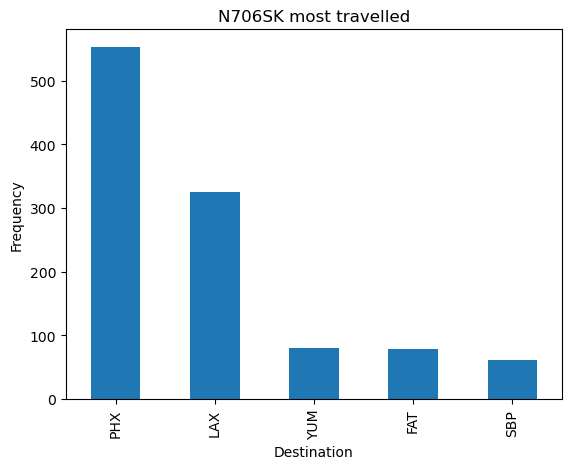

In [104]:
tails_analyze(max_flights_plane)

It looks like N706SK travelled primarily in round trips from Pheonix, Arizona to LAX. It did have some flights to Yuma International Airport in Yuma, Arizona, Fresno Yosemite International Airport in Fresno, California, and to San Luis Obispo County Regional Airport in California. Overall it looks like it travelled for many trips in the southwestern US.

Carrier code: UA


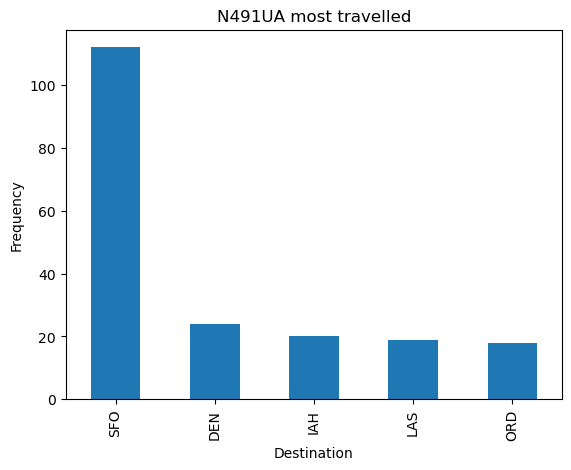

In [106]:
tails_analyze(median_flights_plane)

It looks like N491UA travelled from San Francisco to other airports in the southwestern US like Denver and Las Vegas, but also to a couple further airports like George Bush International Airport in Houston, Texas, and O'Hare International Airport in Chicago, Illinois. Overall it looks to have a more mixed flight history than N706SK with some longer flights.

Carrier code: DL


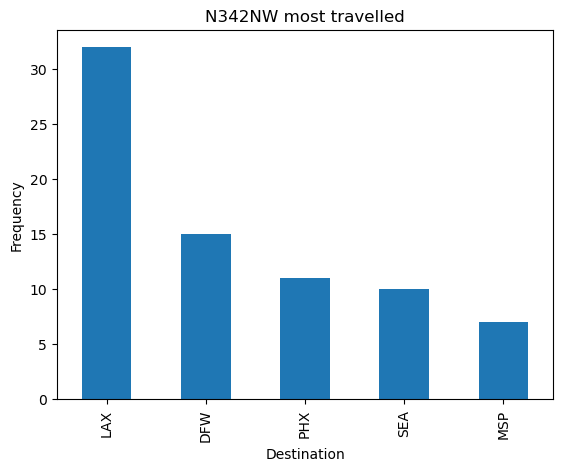

In [108]:
tails_analyze(min_flights_plane)

It looks like N342NW traveled primarily to Los Angeles, then around to Dallas and Phoenix and other southwestern areas. Whats interesting is that one of its top destinations is Minneapolis -- one of the further east airports we're observing from these three charts. Additionally Seattle is one of the further north spots of these top destinations. It seems to triangulate major spots around the general (mid)west.

Previously exploring the minimum freq. flight:
It seems like N821NW had only one flight. Potentially it only had 1 flight because it may have been undergoing deep maintenance that all planes go through at certain intervals. N821NW is an Airbus A330 which had been manufactured in 2007 and had been flying with Delta Airlines since 2009 (See link below for source). This makes 2019 a decade since it began flight operations with Delta Airlines, which potentially is a lifespan threshold for deep maintenance. Deep maintenance operations require taking the plane almost fully apart and then rebuilding it, and given the complexity of large wide-body commercial jets like the A330 it would not be suprising if maintenance takes many months.

Link: https://registry.faa.gov/AircraftInquiry/Search/NNumberResult?nNumberTxt=821NW

In [111]:
# 6.2 Arrival and departure delays at the airports where it traveled.

def arr_dep_delay_plot(tail_num):
    aircraft_info = df.loc[df['TAIL_NUM'] == tail_num]
    aircraft_freq_dest = aircraft_info['DEST'].value_counts().head(5)
    airports = aircraft_freq_dest.index[:5]

    # get the average arrival and departure delay times for frequented airports
    
    def arr_delay_mean(val):
        airport = aircraft_info.loc[aircraft_info['DEST'] == airports[val]]
        return airport['ARR_DELAY'].mean().total_seconds()/60
    
    def dep_delay_mean(val):
        airport = aircraft_info.loc[aircraft_info['DEST'] == airports[val]]
        return airport['DEP_DELAY'].mean().total_seconds()/60
        
    avg_arrival_delay = [arr_delay_mean(0), arr_delay_mean(1), arr_delay_mean(2), arr_delay_mean(3), arr_delay_mean(4)]
    avg_depart_delay = [dep_delay_mean(0), dep_delay_mean(1), dep_delay_mean(2), dep_delay_mean(3), dep_delay_mean(4)]
        
    x_axis = np.arange(len(airports))
    
    plt.bar(x_axis - 0.2, avg_arrival_delay, 0.4, label='Arr. delays')
    plt.bar(x_axis + 0.2, avg_depart_delay, 0.4, label='Dep. delays')
    
    plt.xticks(x_axis, airports)
    plt.xlabel('Destination')
    plt.ylabel('Arr/Dep Delay Time (min)')
    plt.title(tail_num + ' Airports and Delays')
    plt.legend()
    plt.show()

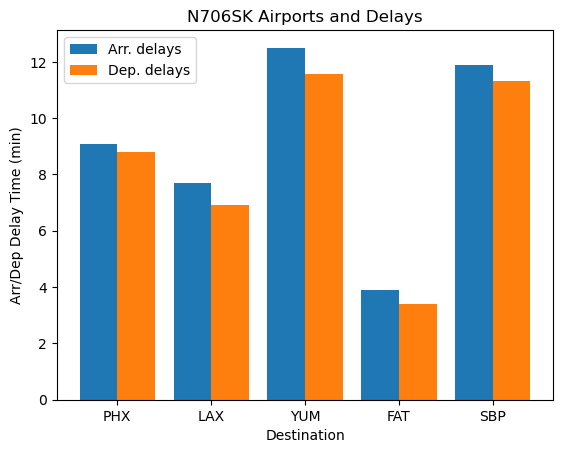

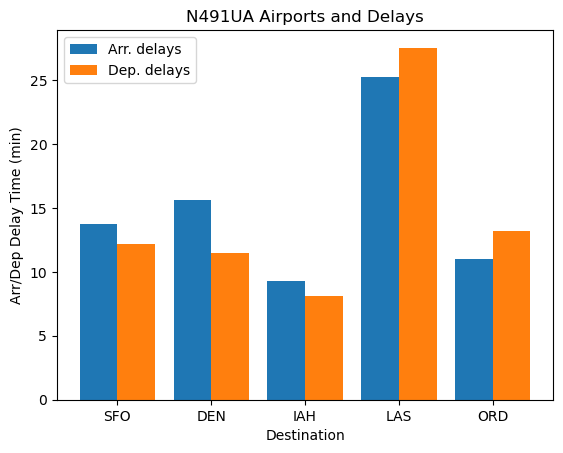

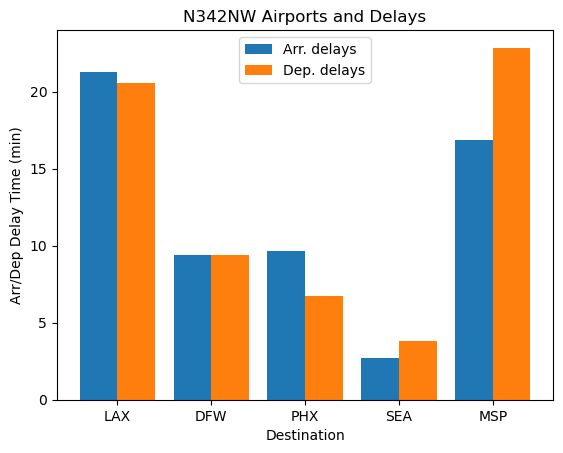

In [112]:
arr_dep_delay_plot(max_flights_plane)
arr_dep_delay_plot(median_flights_plane)
arr_dep_delay_plot(min_flights_plane)

It looks like the number of arrival and departure delays for the different aircraft vary somewhat between different airports. Clearly the aircraft with the minimum number of flights N821NW didn't have any meaningful data for airports and delays due to the fact that it had done only one flight. Interestingly it seems like smaller airports like Yuma International Airport and San Luis Obispo Regional Airport had more delays that larger airports. This is potentially due the air traffic controllers and other airport staff in the larger airports having more experience and thus more efficiency in direction.

In [114]:
# 6.3 Create summary statistics on the distance traveled.

# summary: max, med/mean, min, range, etc...

def distance_summary(tail_num):
    aircraft_info = df.loc[df['TAIL_NUM'] == tail_num]
    max_dist = aircraft_info['DISTANCE'].max()
    mean_dist = aircraft_info['DISTANCE'].mean()
    min_dist = aircraft_info['DISTANCE'].min()
    standev = np.std(aircraft_info['DISTANCE'])
    range_dist = max_dist-min_dist
    print('Summary of '+tail_num+' distance traveled in miles:')
    print('Total miles: '+str(aircraft_info['DISTANCE'].sum()))
    print('Per trip:')
    print('Max: '+str(max_dist)+', mean: '+str(mean_dist)+', min: '+str(min_dist)+', range: '+str(range_dist)+', std: '+str(standev))

In [115]:
distance_summary(max_flights_plane)
distance_summary(median_flights_plane)
distance_summary(min_flights_plane)

Summary of N706SK distance traveled in miles:
Total miles: 731310
Per trip:
Max: 1022, mean: 421.74740484429066, min: 109, range: 913, std: 240.3887199039265
Summary of N491UA distance traveled in miles:
Total miles: 419980
Per trip:
Max: 2584, mean: 1189.745042492918, min: 192, range: 2392, std: 726.5208392727073
Summary of N342NW distance traveled in miles:
Total miles: 130879
Per trip:
Max: 1587, mean: 1168.5625, min: 590, range: 997, std: 290.787102449357


Q6.4: Analyze all the results in 6.1-6.3 to identify any patterns that are evident. 
Explain your findings and visualize ALL results. Summarize the overall analysis and share THREE (3) key findings.

Summary: The major airports of the west for these three planes on average appear to be PHX, LAX, and SFO. Larger airports (on average) are more efficient. Airlines do have major parts to play in delays. Shorter trips have a higher turnaround and accumulations of miles.

1. I found that the most frequently flying aircraft would on average travel less in distance versus the less frequently fying aircraft. The airline it belonged to was a regional airline (skywest), and it fly short distances between airports in Arizona and California. This makes sense because it makes many short trips (faster turn around) just in the area. 

2. There was an interesting point in arrival and departure delays, where they would typically have a higher delay in arrival v. departure except for in Las Vegas and Chicago, where aircraft N491UA (median in flight frequency) would experience a longer delay in departure instead. Additionally, Minneapolis appears to have a more major gap. Reasons why may vary, there are many extraneous variables at play; Possibly by an outlying event, or tardiness of flight crew, or perhaps having a larger intake volume of flights than manageable. Lastly, whats interesting was how Las Vegas had the highest avg delay time of 25 min (in the 3 aircrafts analyzed) -- maybe because it's a more condensed area.

3. Airlines have major roles in delays, as showcased by fig 5.1, where the proportion of the flights delayed by Skywest are low. Then comparing the discrepency between N706SK's LAX delays vs N342NW's LAX delays fig 6.2, it suggests that the airline (Delta) may have a part to play in the greater gap (although PHX seems to have a similar delay measuring between the two.)

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
